## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Possible questions

Does area income effect price of houses

Does grade have an effect on housing price

Does property size effect housing price

Does Age of property effect price

In [1383]:
#find lat and long of city center then subtract out lat and long form it to find the difference 
# weak correlation to test in model Floor waterfront view and grade 

In [1384]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn import metrics
from scipy import stats
import math
from PIL import Image

In [1385]:
df = pd.read_csv("data/kc_house_data_clean.csv")
df =df.drop(["Unnamed: 0"], axis = 1)

Initial Model

Possibly drop

br : sqft liv

sqft liv 15 : sqft liv

sqft above : sqft liv

sqft lot 15 : sqft lot



Keep sqft_living, drop sqft_above, sqft_living15 due to high collinearity 

Keep sqft_lot drop sqft_lot15

df = df.drop(["sqft_above", "sqft_living15", "sqft_lot15", "lat", "long" ], axis=1)

Although the above table shows that there is a high collinearity between bedrooms and sqft_living, we believe that the number of bedrooms will play a key role in the price of the home, will revisit after modeling to verify if we need

In [1386]:
X = df.drop("price", axis=1)
y= df["price"]

In [1387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1388]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16532, 23)
(4134, 23)
(16532,)
(4134,)


In [1389]:
X_train = X_train.apply(pd.to_numeric)

In [1390]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16532, 23)
(4134, 23)
(16532,)
(4134,)


In [1391]:
X_train = df.drop("price", axis=1)
y_train = df["price"]

X_test = df.drop("price", axis=1)
y_test = df["price"]

X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,3,1.00,1180,5650,1.0,0,0,8,1180,0.0,...,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0,0
1,2,1.00,880,6780,1.0,0,2,7,880,0.0,...,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0,0
2,3,2.25,2100,8201,1.0,0,0,9,1620,480.0,...,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0,1
3,3,1.00,1300,5898,1.0,0,0,8,1300,0.0,...,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0,0
4,2,1.00,860,5265,1.0,0,0,7,860,0.0,...,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20661,3,2.50,3110,9930,1.0,0,0,9,1640,1470.0,...,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0,1
20662,4,3.00,2150,8119,2.0,0,0,9,2150,0.0,...,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1,0
20663,5,2.75,3090,19865,1.0,0,2,10,3090,0.0,...,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0,0
20664,3,2.00,2070,9600,1.0,0,0,8,1590,480.0,...,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0,1


In [1392]:
season_model = X_train["season"]
season_model = pd.DataFrame(season_model) 

In [1393]:
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.6620494340336868
Validation score: 0.6611729709858393


In [1394]:
df_numerical = df[['price', 'bedrooms','bathrooms', 'sqft_living', 'floors', 'sqft_lot', 'sqft_basement', 'sqft_living15', 'sqft_lot15','Income',]].copy()

In [1395]:
df_numerical1 = df[['price', 'bedrooms','bathrooms', 'sqft_living', 'floors', 'sqft_lot', 'sqft_basement', 'Income',]].copy()

In [1396]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_numerical1.values, i) for i in range(df_numerical1.shape[1])]
vif["features"] = df_numerical1.columns
vif.round(2)

,VIF Factor,features
0,8.87,price
1,19.35,bedrooms
2,24.28,bathrooms
3,27.66,sqft_living
4,14.35,floors
5,1.18,sqft_lot
6,2.23,sqft_basement
7,5.64,Income


In [1397]:
y = df["price"]
X = df.drop("price", axis=1)

In [1398]:
model = sm.OLS(y, sm.add_constant(X), missing = "drop").fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1838.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:47:05   Log-Likelihood:            -2.7417e+05
No. Observations:               20666   AIC:                         5.484e+05
Df Residuals:                   20643   BIC:                         5.486e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -48.8408      3.137    -15.569

In [1399]:
df = pd.read_csv("data/kc_house_data_clean.csv")
df =df.drop(["Unnamed: 0"], axis = 1)

In [1400]:
#df = df.drop(["sqft_above", "sqft_living15", "sqft_lot15", "lat", "long",'floors','sqft_basement',
#                 'yr_renovated','renovated','waterfront', 'sqft_lot','yr_built', 'condition', 'zipcode',
#                    'year_sold','season', 'house_age','Income','grade'], axis=1)

In [1401]:
#df = df.drop(["lat","long","sqft_above","sqft_basement"], axis=1)
df= df[["price","sqft_living", "condition", "view_cat", "bedrooms","waterfront"]]
df

,price,sqft_living,condition,view_cat,bedrooms,waterfront
0,221900.0,1180,0,0,3,0
1,205425.0,880,2,0,2,0
2,445000.0,2100,0,1,3,0
3,236000.0,1300,0,0,3,0
4,170000.0,860,0,0,2,0
...,...,...,...,...,...,...
20661,1260000.0,3110,0,1,3,0
20662,1200000.0,2150,0,0,4,0
20663,1450000.0,3090,2,0,5,0
20664,1350000.0,2070,0,1,3,0


In [1402]:
df2 = df.to_numpy()

In [1403]:
y = df2[:, 0]
y

array([ 221900.,  205425.,  445000., ..., 1450000., 1350000., 1410000.])

In [1404]:
X = df2[:,1:]
X

array([[1.18e+03, 0.00e+00, 0.00e+00, 3.00e+00, 0.00e+00],
       [8.80e+02, 2.00e+00, 0.00e+00, 2.00e+00, 0.00e+00],
       [2.10e+03, 0.00e+00, 1.00e+00, 3.00e+00, 0.00e+00],
       ...,
       [3.09e+03, 2.00e+00, 0.00e+00, 5.00e+00, 0.00e+00],
       [2.07e+03, 0.00e+00, 1.00e+00, 3.00e+00, 0.00e+00],
       [3.25e+03, 0.00e+00, 0.00e+00, 4.00e+00, 0.00e+00]])

In [1405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1406]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16532, 5)
(4134, 5)
(16532,)
(4134,)


In [1407]:
data_transformation = preprocessing.StandardScaler()
data = data_transformation.fit_transform(X_train)

In [1408]:
model = LinearRegression().fit(data, y_train)
print(model.intercept_)
print(model.coef_)

496237.6535809339
[163749.07265235  19431.34110132  35503.2198962  -25926.85002813
  10332.6192461 ]


In [1409]:
#R**2
accuracy = model.score(data, y_train)
accuracy

0.44686971167533995

In [1410]:
test_accuracy = model.score(data_transformation.transform((X_test)), y_test)
test_accuracy

0.4650721954196334

In [1411]:
y_pred = model.predict(data_transformation.transform(X_test))

In [1412]:
y_pred

array([360084.48332131, 363774.8927092 , 725827.08394982, ...,
       240464.13060694, 380093.68310624, 568634.23307852])

In [1413]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 136342.09501975507
Mean Squared Error: 30794801637.166023
Root Mean Squared Error: 175484.47691225004


In [1414]:
model1 = pd.DataFrame({'Actual value': y_test, 'Predicted value': (y_pred.round(2)), "Difference" : (abs(y_test-y_pred)).round(2)})
model1.sample(10).head(10)


,Actual value,Predicted value,Difference
3561,399950.0,401403.43,1453.43
3983,348000.0,637370.08,289370.08
3541,464000.0,696206.94,232206.94
2119,385000.0,315878.67,69121.33
935,234950.0,347012.87,112062.87
3043,210000.0,244726.08,34726.08
2106,401750.0,315334.01,86415.99
2472,400000.0,330250.84,69749.16
3826,190000.0,379263.26,189263.26
3030,378000.0,270297.78,107702.22


In [1415]:
model2 = model1.sort_values("Difference", ascending=False)

In [1416]:
model3 = model2.head(100)
model3.mean()

Actual value       1.084205e+06
Predicted value    6.452649e+05
Difference         5.507146e+05
dtype: float64

In [1417]:
model3.head()

,Actual value,Predicted value,Difference
3102,1300000.0,352834.25,947165.75
964,1490000.0,573440.84,916559.16
503,1440000.0,540645.79,899354.21
2830,1450000.0,636539.65,813460.35
1555,1470000.0,672766.22,797233.78


In [1418]:
model3.mean()

Actual value       1.084205e+06
Predicted value    6.452649e+05
Difference         5.507146e+05
dtype: float64

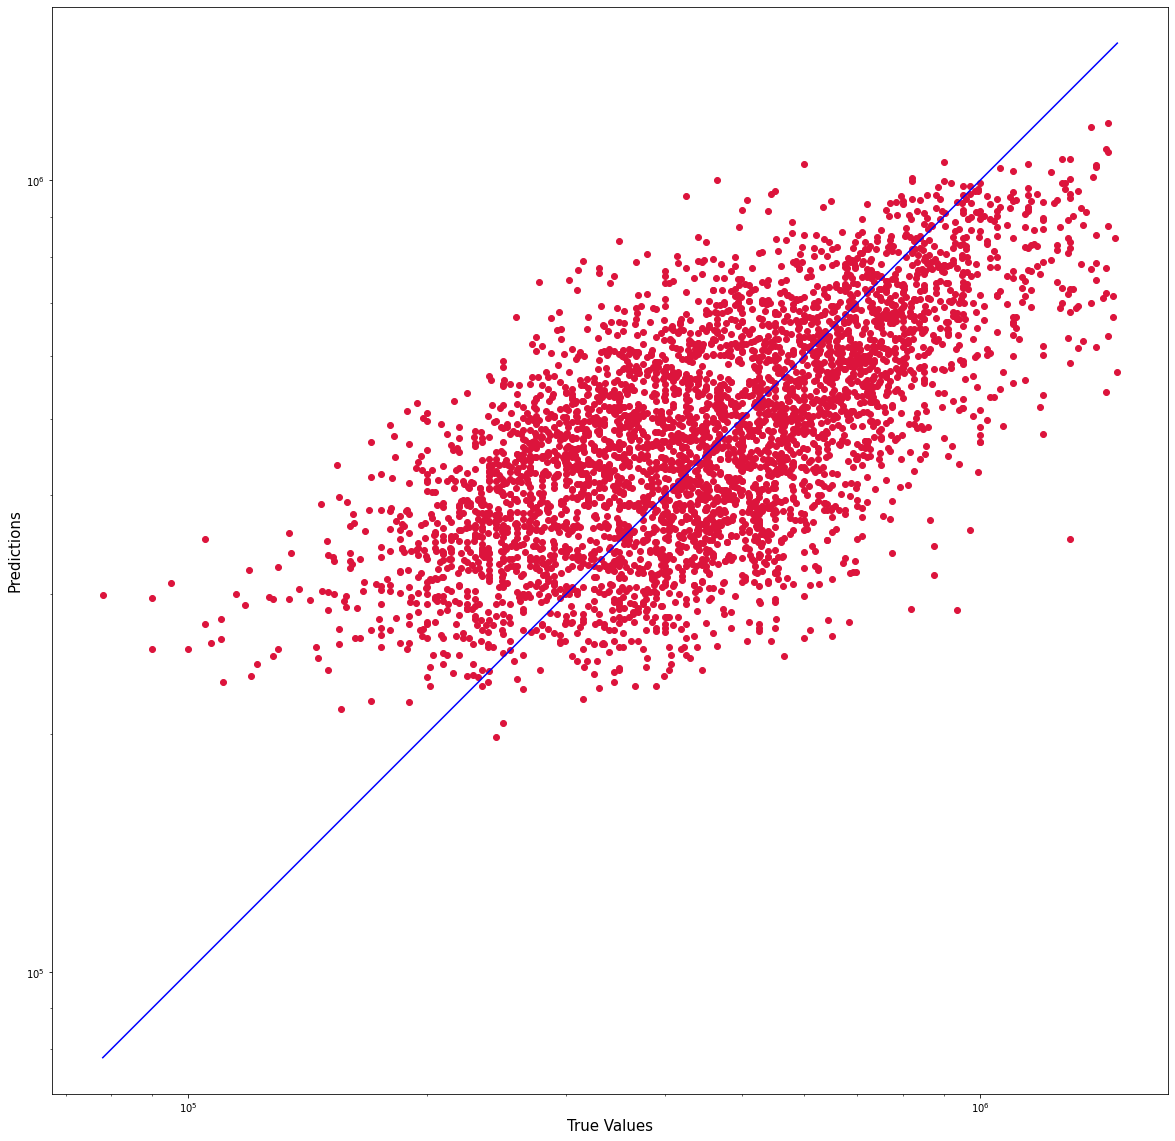

In [1419]:
true_value = model1["Actual value"]
predicted_value = model1["Predicted value"]
plt.figure(figsize=(20,20))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.savefig('prediction.png')
plt.show()



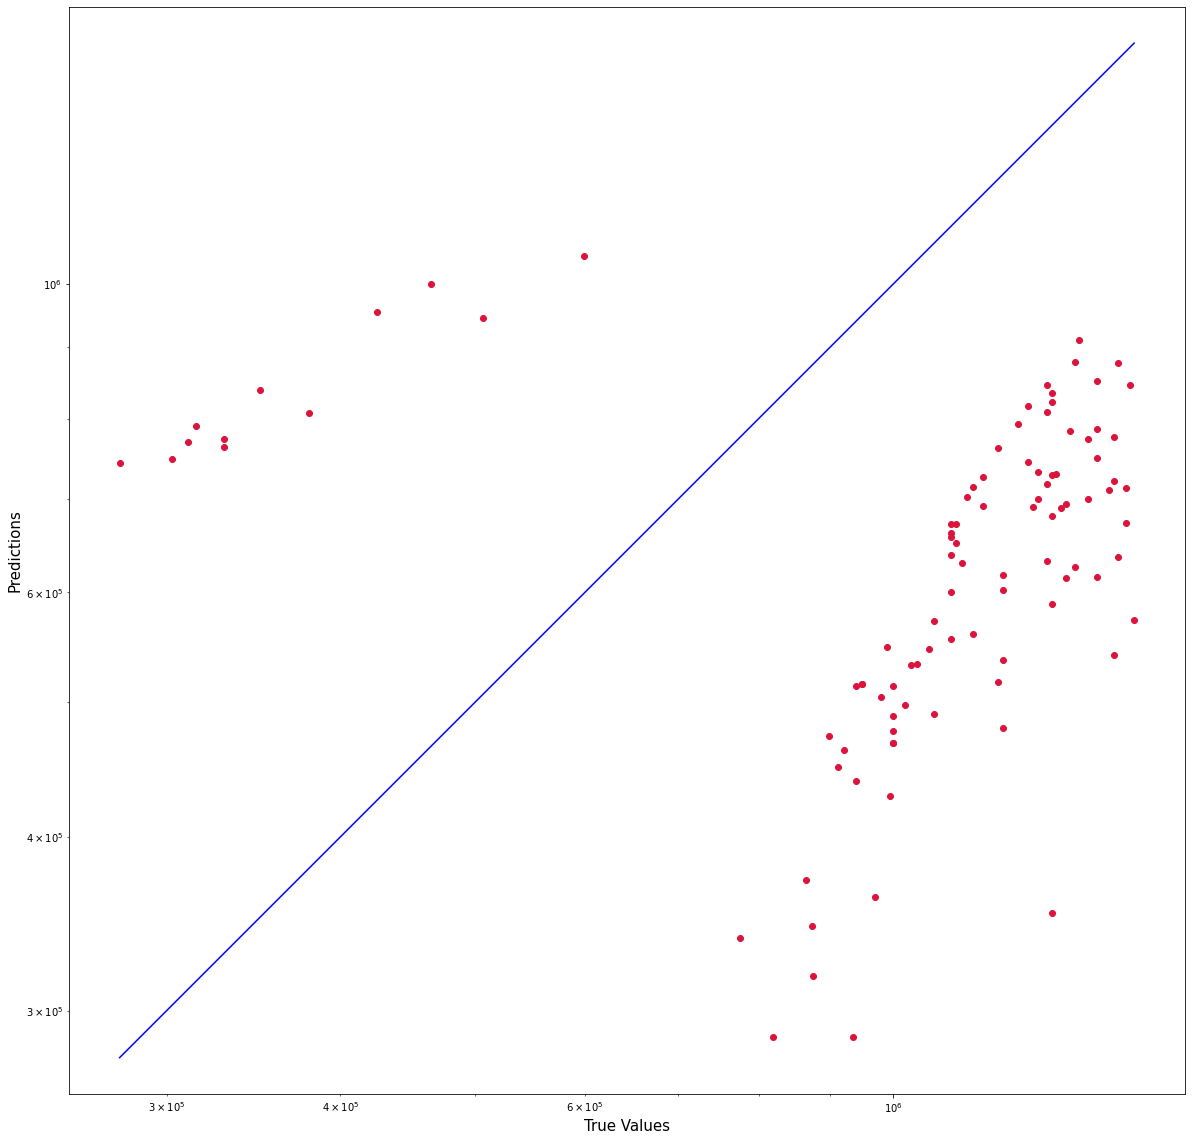

In [1420]:
true_value = model3["Actual value"]
predicted_value = model3["Predicted value"]
plt.figure(figsize=(20,20))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.savefig('limitations.png')
plt.show()


In [1421]:
model2 = pd.DataFrame({'Actual value': y_test, 'Predicted value': (y_pred.round(2)), "Difference" : (abs(y_test-y_pred)).round(2)})
model2.head()

,Actual value,Predicted value,Difference
0,386500.0,360084.48,26415.52
1,410000.0,363774.89,46225.11
2,460000.0,725827.08,265827.08
3,467000.0,470868.28,3868.28
4,323000.0,336902.65,13902.65


In [1422]:
model2.to_csv("data/predictions.csv")

In [1423]:
model3.to_csv("data/high_error_preds.csv")

In [1424]:
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE


175484.47691225004

In [1425]:
len(X_test)

4134

In [1426]:
len(y_test)

4134

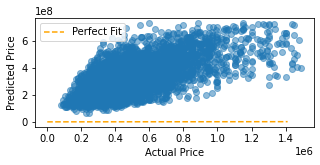

In [1427]:
preds = model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

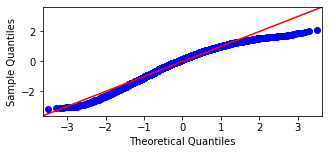

In [1428]:
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

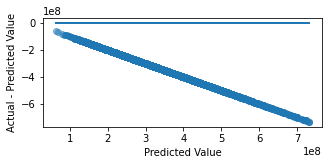

In [1429]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");